In [25]:
import os
import glob
import json
from PIL import Image
import torchvision.transforms as tr
import matplotlib.pyplot as plt

In [36]:
!ls -l ../resources/downloaded/BigEarthNet-v1.0/

total 60808
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170613T101031_0_59
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170613T101031_10_66
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170613T101031_10_79
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170613T101031_11_89
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170613T101031_13_77
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170613T101031_1_44
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170613T101031_16_55
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170613T101031_16_61
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170613T101031_16_74
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170613T101031_16_81
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170613T101031_17_72
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170613T101031_17_73
drwxr-xr-x 2 samuel samuel 409

drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170704T112111_5_72
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170704T112111_57_49
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170704T112111_57_86
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170704T112111_58_23
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170704T112111_5_83
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170704T112111_58_48
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170704T112111_58_83
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170704T112111_59_29
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170704T112111_60_11
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170704T112111_60_21
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170704T112111_60_64
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2A_MSIL2A_20170704T112111_61_26
drwxr-xr-x 2 samuel samuel 4096 18 févr.  

drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20170709T094029_38_43
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20170709T094029_39_33
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20170709T094029_39_4
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20170709T094029_40_70
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20170709T094029_40_72
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20170709T094029_4_15
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20170709T094029_4_18
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20170709T094029_43_8
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20170709T094029_43_89
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20170709T094029_43_9
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20170709T094029_4_79
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20170709T094029_48_42
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019

drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20180421T100029_86_36
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20180421T100029_87_3
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20180421T100029_87_76
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20180421T100029_88_25
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20180421T100029_8_88
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20180421T100029_88_90
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20180421T100029_89_3
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20180421T100029_89_60
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20180421T100029_90_26
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20180421T100029_90_57
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20180421T100029_90_62
drwxr-xr-x 2 samuel samuel 4096 18 févr.  2019 S2B_MSIL2A_20180421T100029_9_19
drwxr-xr-x 2 samuel samuel 4096 18 févr.  20

In [42]:
path = "../resources/downloaded/BigEarthNet-v1.0/S2A_MSIL2A_20170701T093031_12_82"

In [50]:
!ls -l "../resources/downloaded/BigEarthNet-v1.0/S2A_MSIL2A_20170701T093031_12_82"

total 188
-rw-r--r-- 1 samuel samuel  1160 18 févr.  2019 S2A_MSIL2A_20170701T093031_12_82_B01.tif
-rw-r--r-- 1 samuel samuel 29192 18 févr.  2019 S2A_MSIL2A_20170701T093031_12_82_B02.tif
-rw-r--r-- 1 samuel samuel 29192 18 févr.  2019 S2A_MSIL2A_20170701T093031_12_82_B03.tif
-rw-r--r-- 1 samuel samuel 29192 18 févr.  2019 S2A_MSIL2A_20170701T093031_12_82_B04.tif
-rw-r--r-- 1 samuel samuel  7560 18 févr.  2019 S2A_MSIL2A_20170701T093031_12_82_B05.tif
-rw-r--r-- 1 samuel samuel  7560 18 févr.  2019 S2A_MSIL2A_20170701T093031_12_82_B06.tif
-rw-r--r-- 1 samuel samuel  7560 18 févr.  2019 S2A_MSIL2A_20170701T093031_12_82_B07.tif
-rw-r--r-- 1 samuel samuel 29192 18 févr.  2019 S2A_MSIL2A_20170701T093031_12_82_B08.tif
-rw-r--r-- 1 samuel samuel  1160 18 févr.  2019 S2A_MSIL2A_20170701T093031_12_82_B09.tif
-rw-r--r-- 1 samuel samuel  7560 18 févr.  2019 S2A_MSIL2A_20170701T093031_12_82_B11.tif
-rw-r--r-- 1 samuel samuel  7560 18 févr.  2019 S2A_MSIL2A_20170701T093031_12_82_B12.tif
-rw-r--r-- 

In [44]:
with open(f"{path}/S2A_MSIL2A_20170701T093031_12_82_labels_metadata.json", "r") as f:
    metadata = json.load(f)
    print(metadata)

{'labels': ['Broad-leaved forest', 'Coniferous forest', 'Mixed forest', 'Transitional woodland/shrub', 'Water bodies'], 'coordinates': {'ulx': 614400, 'uly': 6901620, 'lrx': 615600, 'lry': 6900420}, 'projection': 'PROJCS["WGS 84 / UTM zone 35N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",27],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32635"]]', 'tile_source': 'S2A_MSIL1C_20170701T093031_N0205_R136_T35VPK_20170701T093032.SAFE', 'acquisition_date': '2017-07-01 09:30:31'}


In [45]:
def my_pil_loader(path: str) -> Image.Image:
    # open path as file to avoid ResourceWarning
    # (https://github.com/python-pillow/Pillow/issues/835)
    f = open(path, 'rb')
    img = Image.open(f)
    return img.convert('RGB')

In [60]:
pil_image = my_pil_loader(f"{path}/S2A_MSIL2A_20170701T093031_12_82_B01.tif")

In [61]:
x = tr.ToTensor()(pil_image)

In [62]:
x.size()

torch.Size([3, 20, 20])

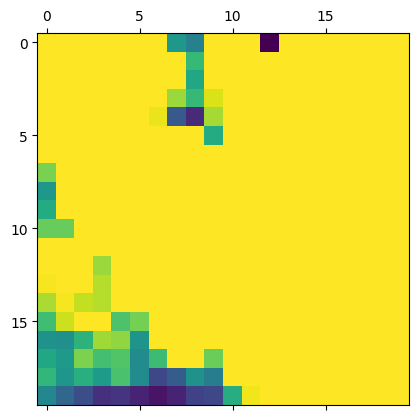

In [63]:
plt.matshow(x[0])